<a href="https://colab.research.google.com/github/sai-darshan-k/Reinforcement-Learning/blob/main/2348548_RL_Lab3_MDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov Decision Process (MDP) Simulation with Value Iteration

**Markov Decision Process** is defined as a stochastic decision making process which uses a mathematical framework for modelling the decision-making of a dynamic system where the outcomes are either random or under the control of a decision maker (agent).

A **Markov Decision Process (MDP)** consists of the following components:

- **State Space (S)**: A set of possible states of the system.
- **Actions (A)**: A list of actions the agent can perform.
- **Transition Probability (T)**: This represents the probability of transitioning from one state to another state when an action is performed.
Transition Probability written as $ P(s' | s, a)$, which is the probability of ending in state $ s' $ after taking an action $ a $ in state $ s $.
- **Reward Function (R)**: The reward attained after transitioning to a new state.
- **Discount Factor ($ \gamma $)**: A value ranging from 0.0 to 1.0 that determines the future rewards compared to immediate rewards.

### one primary goal of MDP is to formulate a policy that maximizes expected sum of discounted rewards over time.

# Implementation of MDP with value iteration algorithm for a grid based robot path problem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
class MDP_Grid:
    def __init__(self, grid_size, start_end_states, rewards, discount_factor = 0.8):
        self.grid_size = grid_size # size of environment(grid) NXN
        self.rewards = rewards  # dictionary values (state, action) becomes reward (mapped rewards)
        self.start_end_states = start_end_states
        self.discount_factor = discount_factor # Discount factor for reward balancing
        self.actions = ['down', 'up', 'left', 'right'] # possible actions for the agent
        self.transitioning_probabilities = self.get_transitioning_probabilities() # Method to get the transition probabilities for each state

    # Method for getting the transition probabilities for each state and action
    def get_transitioning_probabilities(self):
        transitions = {}
        for row in range(self.grid_size):
            for col in range(self.grid_size):
                state = (row, col)
                transitions[state] = {}
                for action in self.actions:
                    transitions[state][action] = self.get_transitioning_state(state, action)
        return transitions

    # Method to get the transitioning state for a given state and action and the probability of the transition
    def get_transitioning_state(self, state, action):
        row, col = state
        if state in self.start_end_states:
            return [(state, 1.0)] # No need to change or move from the final state

        if action == 'down':
            new_state = (min(row + 1, self.grid_size - 1), col)
        elif action == 'up':
            new_state = (max(row - 1, 0), col)
        elif action == 'left':
            new_state = (row, max(col - 1, 0))
        elif action == 'right':
            new_state = (row, min(col + 1, self.grid_size - 1))
        return [(new_state, 1.0)] # returning the new state based on action along with a probability of 1 as this a simple problem case

    # Method to calculate the expected reward for a given state and action
    def get_expected_reward(self, state, action):
        return self.rewards.get((state, action), 0)


In [ ]:
# Action Value Calculator
def action_val_cal(mdp_class, state, action, value_function):
    transitions = mdp_class.transitioning_probabilities[state][action]
    action_value = 0
    for new_state, probability in transitions:
        reward = mdp_class.get_expected_reward(state, action)
        # new_state to row and col
        new_row, new_col = new_state
        # accessing the value function using the row and col indices
        action_value += probability * (reward + mdp_class.discount_factor * value_function[new_row, new_col])
    return action_value

# Optimal Policy extractor
def opt_policy_extrator(mdp_class, value_function):
    optimal_policy = {}
    for row in range(mdp_class.grid_size):
        for col in range(mdp_class.grid_size):
            now_state = (row, col)
            if now_state in mdp_class.start_end_states:
                continue

            optimal_action = None
            optimal_action_value = float('-inf')  # Correcting this to negative infinity
            for action in mdp_class.actions:
                action_value = action_val_cal(mdp_class, now_state, action, value_function)
                if action_value > optimal_action_value:
                    optimal_action_value = action_value
                    optimal_action = action

            optimal_policy[now_state] = optimal_action

    return optimal_policy

# Value Iteration Algorithm
def VI_Algorithm(mdp_class, convergence_limit=0.001):
    # we initialize the values of the grids to zeros and all the states too
    value_function = np.zeros((mdp_class.grid_size, mdp_class.grid_size))

    while True:
        delta = 0  # change counter
        new_value_function = np.copy(value_function)

        for row in range(mdp_class.grid_size):
            for col in range(mdp_class.grid_size):
                now_state = (row, col)
                if now_state in mdp_class.start_end_states:
                    continue  # this is for skipping initial and final states

                optimal_action_value = float('-inf')
                for action in mdp_class.actions:
                    action_value = action_val_cal(mdp_class, now_state, action, value_function)
                    optimal_action_value = max(optimal_action_value, action_value)

                new_value_function[row, col] = optimal_action_value
                delta = max(delta, abs(new_value_function[row, col] - value_function[row, col]))

        value_function = new_value_function
        if delta < convergence_limit:
            break

    # get the optimal policy from value function after convergence
    optimal_policy = opt_policy_extrator(mdp_class, value_function)
    return value_function, optimal_policy


In [ ]:
def visualize_grid(value_function, optimal_policy, grid_size):
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot value function as a heatmap
    sns.heatmap(value_function, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, square=True, linewidths=0.5, ax=ax)

    # Define arrow directions for the optimal policy
    action_arrows = {
        'up': (0, -0.3),
        'down': (0, 0.3),
        'left': (-0.3, 0),
        'right': (0.3, 0)
    }

    # Add arrows for the optimal policy
    for (row, col), action in optimal_policy.items():
        if action in action_arrows:
            dx, dy = action_arrows[action]
            ax.arrow(col + 0.5, row + 0.5, dx, dy, head_width=0.1, head_length=0.1, fc='black', ec='black')

    # Customize the plot
    ax.set_title("Value Function and Optimal Policy (with arrows)")
    plt.show()


Optimal Value Function:
[[ 0.          6.21178959  6.90198844  7.66978959  6.90198844  6.21178959
   5.58978844  5.03080959]
 [ 6.21178959  6.90198844  7.66978959  8.52198844  7.66978959  6.90198844
   6.21178959  5.58978844]
 [ 6.90198844  7.66978959  8.52198844  9.46978959  8.52198844  7.66978959
   6.90198844  6.21178959]
 [ 7.66978959  8.52198844  9.46978959 10.52198844  9.46978959  8.52198844
   7.66978959  6.90198844]
 [ 6.90198844  7.66978959  8.52198844  9.46978959  8.52198844  7.66978959
   6.90198844  6.21178959]
 [ 6.21178959  6.90198844  7.66978959  8.52198844  7.66978959  6.90198844
   6.21178959  5.58978844]
 [ 5.58978844  6.21178959  6.90198844  7.66978959  6.90198844  6.21178959
   5.58978844  5.03080959]
 [ 5.03080959  5.58978844  6.21178959  6.90198844  6.21178959  5.58978844
   5.03080959  0.        ]]

Optimal Policy:
State (0, 0): Terminal


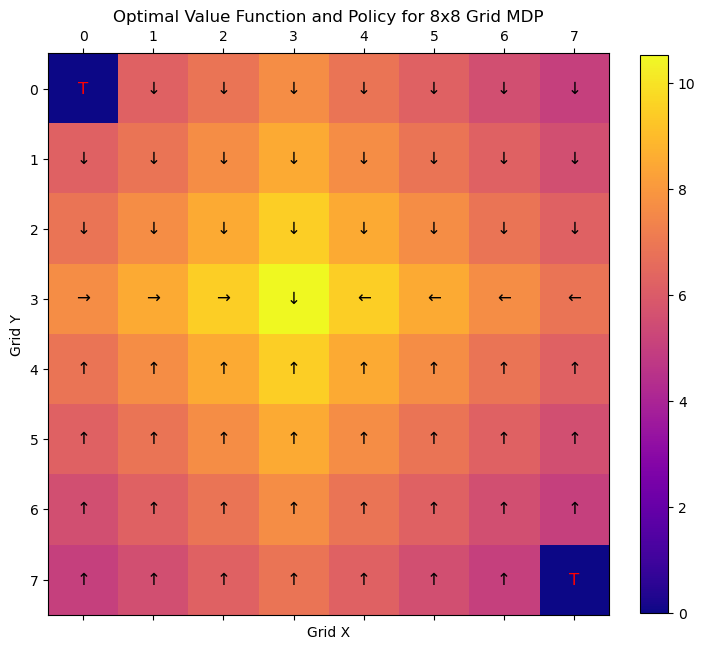

State (0, 1): down
State (0, 2): down
State (0, 3): down
State (0, 4): down
State (0, 5): down
State (0, 6): down
State (0, 7): down
State (1, 0): down
State (1, 1): down
State (1, 2): down
State (1, 3): down
State (1, 4): down
State (1, 5): down
State (1, 6): down
State (1, 7): down
State (2, 0): down
State (2, 1): down
State (2, 2): down
State (2, 3): down
State (2, 4): down
State (2, 5): down
State (2, 6): down
State (2, 7): down
State (3, 0): right
State (3, 1): right
State (3, 2): right
State (3, 3): down
State (3, 4): left
State (3, 5): left
State (3, 6): left
State (3, 7): left
State (4, 0): up
State (4, 1): up
State (4, 2): up
State (4, 3): up
State (4, 4): up
State (4, 5): up
State (4, 6): up
State (4, 7): up
State (5, 0): up
State (5, 1): up
State (5, 2): up
State (5, 3): up
State (5, 4): up
State (5, 5): up
State (5, 6): up
State (5, 7): up
State (6, 0): up
State (6, 1): up
State (6, 2): up
State (6, 3): up
State (6, 4): up
State (6, 5): up
State (6, 6): up
State (6, 7): up


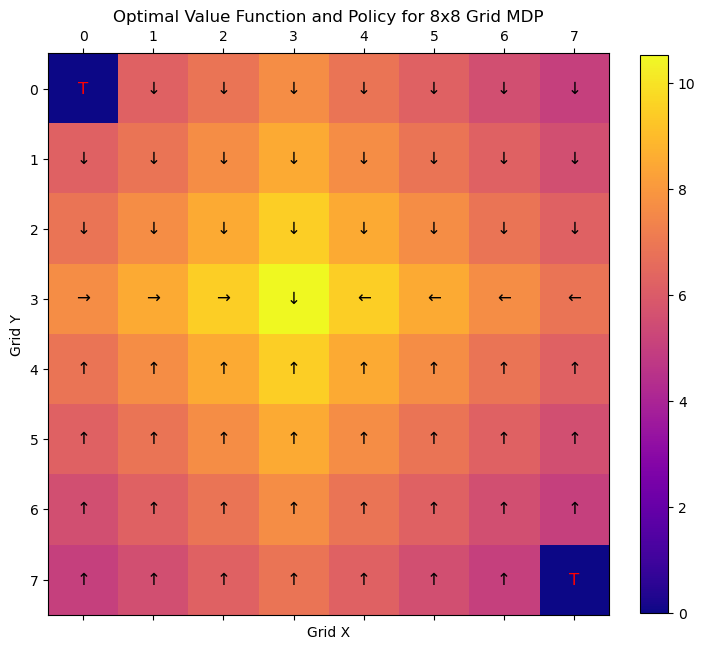

In [ ]:
# Simulator

# 8x8 Grid MDP
grid_size = 8
start_end_states = [(0, 0), (7, 7)]  # Terminal states at (0, 0) and (7, 7)
reward_map = {
    ((7, 6), 'right'): 1,  # Reward for moving right from (7, 6) to (7, 7)
    ((7, 7), 'up'): 0,     # Terminal state has no reward
    ((3, 3), 'down'): 2,   # Reward for moving down from (3, 3) to (4, 3)
    ((3, 3), 'right'): 1,  # Reward for moving right from (3, 3) to (3, 4)
    ((3, 4), 'down'): 0    # No reward for moving down from (3, 4) to (4, 4)
}
discount_factor = 0.9

# MDP class creation
decision_model = MDP_Grid(grid_size, start_end_states, reward_map, discount_factor)

# Run value iteration algorithm
optimal_value_function, optimal_policy = VI_Algorithm(decision_model)

# Display results
print("Optimal Value Function:")
print(optimal_value_function)
print("\nOptimal Policy:")
for row in range(grid_size):
    for col in range(grid_size):
        state = (row, col)
        if state in optimal_policy:
            print(f"State ({row}, {col}): {optimal_policy[state]}")
        else:
            print(f"State ({row}, {col}): Terminal")
            visualize_grid(optimal_value_function, optimal_policy, grid_size)


# 2nd Iteration for a Grid Map with updates likes obstacles, negative rewards and pitfalls

Optimal Value Function:
[[0.         3.35251213 3.72501348 4.13983213 4.59981348 4.13983213
  3.72501348 3.35251213]
 [3.35251213 3.72501348 4.13983213 4.59981348 5.11183213 4.59981348
  4.13983213 3.72501348]
 [3.72501348 4.13983213 4.59981348 5.11183213 5.67981348 5.11183213
  4.59981348 4.13983213]
 [4.13983213 4.59981348 5.11183213 5.67981348 6.31183213 5.67981348
  5.11183213 4.59981348]
 [3.72501348 4.13983213 4.59981348 5.11183213 5.97981348 5.38183213
  4.84281348 4.35853213]
 [3.52965913 3.92184348 4.35853213 4.84281348 5.38183213 4.84281348
  4.35853213 3.92184348]
 [3.17585778 3.52965913 3.92184348 4.35853213 4.84281348 4.73395146
  4.25994606 3.83395146]
 [3.10495146 3.44994606 3.83395146 4.25994606 4.73395146 5.25994606
  4.73395146 0.        ]]

Optimal Policy:
State (0, 0): Terminal


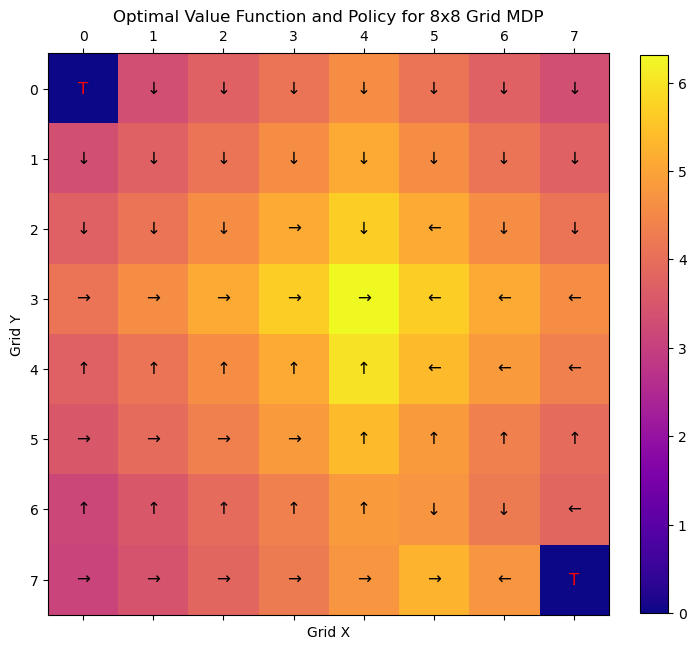

State (0, 1): down
State (0, 2): down
State (0, 3): down
State (0, 4): down
State (0, 5): down
State (0, 6): down
State (0, 7): down
State (1, 0): down
State (1, 1): down
State (1, 2): down
State (1, 3): down
State (1, 4): down
State (1, 5): down
State (1, 6): down
State (1, 7): down
State (2, 0): down
State (2, 1): down
State (2, 2): down
State (2, 3): right
State (2, 4): down
State (2, 5): left
State (2, 6): down
State (2, 7): down
State (3, 0): right
State (3, 1): right
State (3, 2): right
State (3, 3): right
State (3, 4): right
State (3, 5): left
State (3, 6): left
State (3, 7): left
State (4, 0): up
State (4, 1): up
State (4, 2): up
State (4, 3): up
State (4, 4): up
State (4, 5): left
State (4, 6): left
State (4, 7): left
State (5, 0): right
State (5, 1): right
State (5, 2): right
State (5, 3): right
State (5, 4): up
State (5, 5): up
State (5, 6): up
State (5, 7): up
State (6, 0): up
State (6, 1): up
State (6, 2): up
State (6, 3): up
State (6, 4): up
State (6, 5): down
State (6, 6

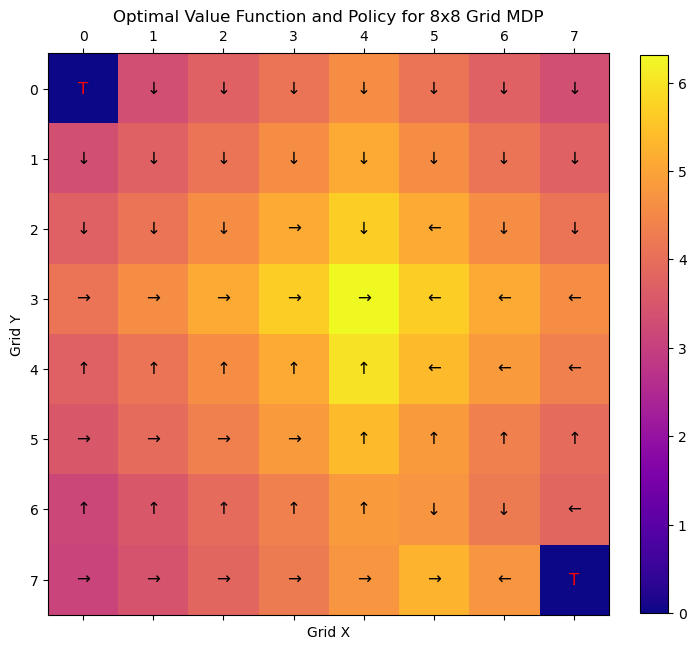

In [ ]:
grid_size = 8
start_end_states = [(0, 0), (7, 7)]  # Start at (0, 0), end at (7, 7)

reward_map = {
    # Positive rewards (good moves towards the goal)
    ((7, 6), 'right'): 1,   # Moving right to reach the goal at (7, 7)
    ((6, 6), 'right'): 0.5,  # Progressing towards the goal
    ((5, 6), 'right'): 0.5,
    ((4, 5), 'right'): 0.3,
    ((4, 4), 'up'): 0.3,

    # Strategic shortcuts with higher rewards
    ((3, 4), 'right'): 1.2,  # Shorter path with extra reward for moving right

    # Negative rewards (penalties/traps)
    ((2, 3), 'down'): -1,    # Trap at (2, 3)
    ((1, 4), 'left'): -1,    # Penalty at (1, 4) for going left
    ((5, 2), 'down'): -2,    # Deep penalty trap at (5, 2)

    # High-penalty obstacles (inaccessible areas)
    ((2, 2), 'right'): -5,   # Severe obstacle at (2, 2)
    ((3, 3), 'down'): -3,    # Strong penalty at (3, 3) for going down
    ((5, 5), 'down'): -5,    # Obstacle at (5, 5) blocks progress

    # Walls or non-navigable regions with extremely high negative rewards
    ((4, 3), 'right'): -10,  # Impassable barrier at (4, 3)
    ((6, 4), 'left'): -10,   # Blocked region with penalty

    # Neutral moves (default movement with no reward or penalty)
    ((3, 3), 'right'): 0,    # Neutral reward at (3, 3)
    ((4, 4), 'down'): 0,     # Neutral at (4, 4)

    # Random pitfalls with varying penalties
    ((2, 5), 'down'): -1.5,  # Trap at (2, 5)
    ((3, 6), 'down'): -1.5,  # Another trap at (3, 6)

    # More positive rewards as robot nears the goal
    ((6, 7), 'down'): 1.5,   # Moving towards the terminal
    ((7, 5), 'right'): 1,    # Reward for moving towards the final state
}
discount_factor = 0.9

# MDP class creation
decision_model = MDP_Grid(grid_size, start_end_states, reward_map, discount_factor)

# Run value iteration algorithm
optimal_value_function, optimal_policy = VI_Algorithm(decision_model)

# Display results
print("Optimal Value Function:")
print(optimal_value_function)
print("\nOptimal Policy:")
for row in range(grid_size):
    for col in range(grid_size):
        state = (row, col)
        if state in optimal_policy:
            print(f"State ({row}, {col}): {optimal_policy[state]}")
        else:
            print(f"State ({row}, {col}): Terminal")
            visualize_grid(optimal_value_function, optimal_policy, grid_size)



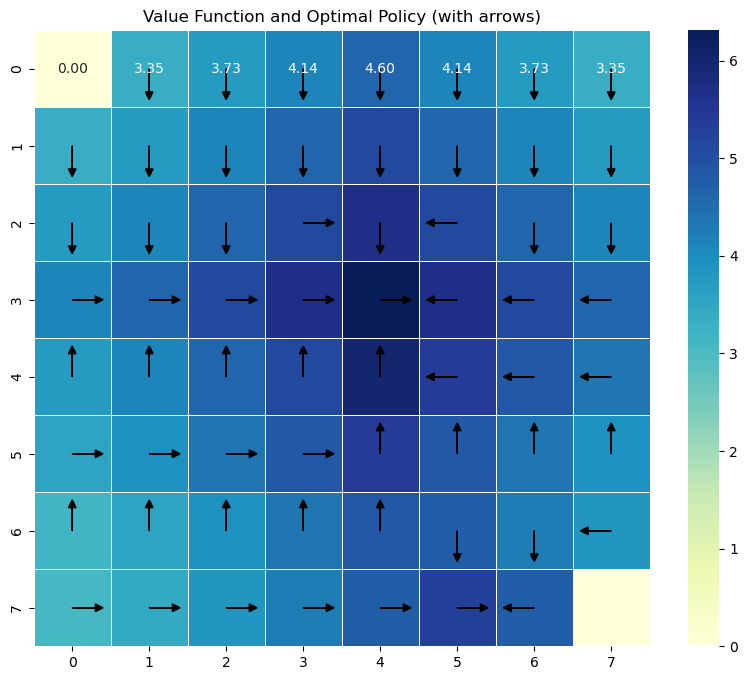

In [ ]:
visualize_grid(optimal_value_function, optimal_policy, grid_size)
